In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle 
%matplotlib inline

In [2]:
radii_filename = "region_radius_scan_2d.pkl"

In [3]:
with open(radii_filename, "rb") as input_stream:
    data = pickle.load(input_stream)

In [4]:
data.keys()

dict_keys(['experiments', 'config', 'radii'])

In [5]:
data["radii"]

[0.001, 0.01, 0.05, 0.1, 0.2, 0.4]

In [6]:
data["config"]

{'n_samples': 10000,
 'n_init_pts': 10,
 'n_iter': 24,
 'n_trials': 64,
 'n_test_samples': 1000,
 'n_dev_samples': 1000,
 'input_dims': 2,
 'n_layers': 3,
 'n_nodes': 16,
 'batches': 1000,
 'batch_size': 32,
 'lr': 0.01}

In [7]:
data["experiments"]

[array([[0.16876666, 0.10369303, 0.19799387, ..., 0.08940584, 0.09772025,
         0.0953934 ],
        [0.10063069, 0.07124542, 0.07435488, ..., 0.05988898, 0.07096945,
         0.06269563],
        [0.09959301, 0.22836237, 0.10999312, ..., 0.09499077, 0.12459445,
         0.12067828],
        ...,
        [0.12543954, 0.10118422, 0.07886874, ..., 0.09900675, 0.0906116 ,
         0.07152168],
        [0.13565317, 0.11974688, 0.10920903, ..., 0.07590449, 0.13215634,
         0.1050703 ],
        [0.10536383, 0.06539933, 0.12128723, ..., 0.10005817, 0.09411107,
         0.05308202]]),
 array([[0.09334467, 0.09902729, 0.10016638, ..., 0.10091433, 0.06714841,
         0.11142687],
        [0.0996727 , 0.22705394, 0.11788   , ..., 0.11203302, 0.10293921,
         0.09040096],
        [0.1195395 , 0.09868668, 0.1221361 , ..., 0.13797566, 0.07644486,
         0.09812962],
        ...,
        [0.07435253, 0.09902953, 0.13204704, ..., 0.10501723, 0.12795874,
         0.08865376],
        [0.1

In [10]:
if not os.path.exists("./figures"):
    os.mkdir("./figures")

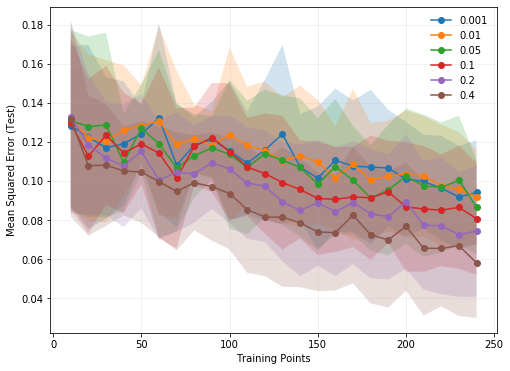

In [11]:
plt.figure(figsize=(8,6))

for radius, experiment in zip(data["radii"], data["experiments"]):
    mean = experiment.mean(axis=0)
    std = experiment.std(axis=0)
    npts = data["config"]["n_init_pts"]
    steps = np.arange(npts,npts * (len(mean) + 1),npts)
    plt.plot(steps, mean, label=radius, marker="o")
    plt.fill_between(steps, mean-std, mean+std, alpha=0.2)
    
plt.grid(alpha=0.2)
plt.legend(frameon=False)
plt.xlabel("Training Points")
plt.ylabel("Mean Squared Error (Test)")
plt.savefig("figures/region_sampling_radius_scan_2d.png", bbox_inches="tight")
plt.savefig("figures/region_sampling_radius_scan_2d.pdf", bbox_inches="tight")